# Proyek Analisis Data: Air Quality
- **Nama:** Silvi Dian Pramana
- **Email:** silvidianpramana@gmail.com
- **ID Dicoding:** silvi_dian_pramana

## Menentukan Pertanyaan Bisnis

1. **Bagaimana tren polusi udara dalam 6 Bulan atau 1 Tahun terakhir di berbagai lokasi?**  
2. **Seberapa kuat hubungan antara kelembaban udara (RH) dan tingkat polusi udara dalam berbagai kondisi cuaca?**  
3. **Pada waktu kapankah rata-rata konsentrasi masing-masing polutan mencapai puncaknya?**  

## Import Semua Packages/Library yang Digunakan

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import io
import requests

## Data Wrangling

### Gathering Data

Dataset yang saya gunakan untuk proyek analisis data ini adalah dataset kualitas udara. Folder data berisi dua belas dataset berbentuk CSV yang memuat data kualitas udara dari dua belas distrik dalam rentang waktu lima tahun dari 1 Maret 2013 hingga 28 Februari 2017

Dalam tahapan gathering data ini, saya menggunakan library os untuk membuat list nama dokumen CSV yang tertera dalam folder ke dalam variabel bernama dataset_list. Dengan menggunakan perulangan, saya membaca seluruh dokumen CSV ke dalam bentuk DataFrame dan menyimpannya ke dalam sebuah list bernama dataframes

In [106]:
data_df = pd.read_csv("https://raw.githubusercontent.com/lupi2804/analisis-data-dicoding/main/Dashbord/dataset_reduced.csv")

print(data_df.head())

   year  month  day  hour  PM2.5   PM10   SO2    NO2      CO       O3  TEMP  \
0  2013     11    2    20  257.0  265.0  22.0  110.0  2400.0    3.213   8.6   
1  2014      3    6     3    7.0    9.0   3.0    6.0   400.0   78.000  -1.8   
2  2014      4   29    11   94.0  181.0  21.0   85.0   900.0   71.000  23.3   
3  2015      9   17    19  136.0  160.0  14.0   45.0  1300.0  144.000  25.0   
4  2014      1   30    19   79.0  108.0  49.0   77.0  1400.0   14.000   1.4   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1017.4   7.4   0.0   SW   0.9         Dongsi  
1  1021.2 -22.4   0.0   NW   0.9      Changping  
2  1004.4   4.7   0.0   SE   1.3      Changping  
3  1011.6  16.2   0.0  SSW   1.0  Wanshouxigong  
4  1010.3  -5.5   0.0  SSE   1.6        Huairou  


In [ ]:
PRSA_Data_Aotizhongxin_df = pd.read_csv("https://raw.githubusercontent.com/lupi2804/analisis-data-dicoding/main/data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")

print(PRSA_Data_Aotizhongxin_df.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


In [ ]:
PRSA_Data_Changping_df = pd.read_csv("https://raw.githubusercontent.com/lupi2804/analisis-data-dicoding/main/data/PRSA_Data_Changping_20130301-20170228.csv")
print(PRSA_Data_Changping_df.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping  


In [ ]:
PRSA_Data_Dingling_df = pd.read_csv("https://raw.githubusercontent.com/lupi2804/analisis-data-dicoding/main/data/PRSA_Data_Dingling_20130301-20170228.csv")
print(PRSA_Data_Dingling_df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling  


In [ ]:
PRSA_Data_Dongsi_df = pd.read_csv("https://raw.githubusercontent.com/lupi2804/analisis-data-dicoding/main/data/PRSA_Data_Dongsi_20130301-20170228.csv")
print(PRSA_Data_Dongsi_df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  


In [ ]:
PRSA_Data_Guanyuan_df = pd.read_csv("https://raw.githubusercontent.com/lupi2804/analisis-data-dicoding/main/data/PRSA_Data_Guanyuan_20130301-20170228.csv")
print(PRSA_Data_Guanyuan_df.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4  1025.2 -19.5   0.0    N   2.0  Guanyuan  


In [ ]:
PRSA_Data_Gucheng_df = pd.read_csv("https://raw.githubusercontent.com/lupi2804/analisis-data-dicoding/main/data/PRSA_Data_Gucheng_20130301-20170228.csv")
print(PRSA_Data_Gucheng_df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng  


In [ ]:
PRSA_Data_Huairou_df = pd.read_csv("https://raw.githubusercontent.com/lupi2804/analisis-data-dicoding/main/data/PRSA_Data_Huairou_20130301-20170228.csv")
print(PRSA_Data_Huairou_df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    7.0   7.0  3.0  2.0  100.0  91.0  -2.3   
1   2  2013      3    1     1    4.0   4.0  3.0  NaN  100.0  92.0  -2.7   
2   3  2013      3    1     2    4.0   4.0  NaN  NaN  100.0  91.0  -3.2   
3   4  2013      3    1     3    3.0   3.0  3.0  2.0    NaN   NaN  -3.3   
4   5  2013      3    1     4    3.0   3.0  7.0  NaN  300.0  86.0  -4.1   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1020.3 -20.7   0.0  WNW   3.1  Huairou  
1  1020.8 -20.5   0.0  NNW   1.5  Huairou  
2  1020.6 -21.4   0.0   NW   1.8  Huairou  
3  1021.3 -23.7   0.0  NNW   2.4  Huairou  
4  1022.1 -22.7   0.0  NNW   2.2  Huairou  


In [ ]:
PRSA_Data_Nongzhanguan_df = pd.read_csv("https://raw.githubusercontent.com/lupi2804/analisis-data-dicoding/main/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
print(PRSA_Data_Nongzhanguan_df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0  -0.5   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0  -0.7   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0  -1.2   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan  
1  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan  
2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan  
3  1026.2 -25.5   0.0    N   4.9  Nongzhanguan  
4  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan  


In [ ]:
PRSA_Data_Shunyi_df = pd.read_csv("https://raw.githubusercontent.com/lupi2804/analisis-data-dicoding/main/data/PRSA_Data_Shunyi_20130301-20170228.csv")
print(PRSA_Data_Shunyi_df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station  
0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  1027.7 -22.9   0.0  NW   4.5  Shunyi  


In [ ]:
PRSA_Data_Tiantan_df = pd.read_csv("https://raw.githubusercontent.com/lupi2804/analisis-data-dicoding/main/data/PRSA_Data_Tiantan_20130301-20170228.csv")
print(PRSA_Data_Tiantan_df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3  1026.2 -25.5   0.0    N   4.9  Tiantan  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan  


In [ ]:
PRSA_Data_Wanliu_df = pd.read_csv("https://raw.githubusercontent.com/lupi2804/analisis-data-dicoding/main/data/PRSA_Data_Wanliu_20130301-20170228.csv")
print(PRSA_Data_Wanliu_df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
3  1024.5 -19.4   0.0   NW   3.1  Wanliu  
4  1025.2 -19.5   0.0    N   2.0  Wanliu  


In [ ]:
PRSA_Data_Wanshouxigong_df = pd.read_csv("https://raw.githubusercontent.com/lupi2804/analisis-data-dicoding/main/data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
print(PRSA_Data_Wanshouxigong_df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  


In [4]:
# Daftar nama stasiun
stations = [
    "Aotizhongxin", "Changping", "Dingling", "Dongsi", "Guanyuan", "Gucheng",
    "Huairou", "Nongzhanguan", "Shunyi", "Tiantan", "Wanliu", "Wanshouxigong"
]

# Gabungkan semua data stasiun langsung tanpa dataset_list
full_df = pd.concat(
    (
        pd.read_csv(f"data/PRSA_Data_{station}_20130301-20170228.csv").assign(station=station)
        for station in stations
    ),
    ignore_index=True
)

# Simpan file hasil gabungan (opsional)
full_df.to_csv("data/full_dataset.csv", index=False)

# Cek hasil
full_df.info()
full_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
aotizhongxin_df = pd.DataFrame({"col1": [1, 2], "col2": [3, 4]})
changping_df = pd.DataFrame({"col1": [5, 6], "col2": [7, 8]})
dingling_df = pd.DataFrame({"col1": [9, 10], "col2": [11, 12]})
dongsi_df = pd.DataFrame({"col1": [13, 14], "col2": [15, 16]})
guanyuan_df = pd.DataFrame({"col1": [13, 14], "col2": [15, 16]})
gucheng_df = pd.DataFrame({"col1": [17, 18], "col2": [19, 20]})
huairou_df = pd.DataFrame({"col1": [21, 22], "col2": [23, 24]})
nongzhanguan_df = pd.DataFrame({"col1": [25, 26], "col2": [27, 28]})
shunyi_df = pd.DataFrame({"col1": [29, 30], "col2": [31, 32]})
tiantan_df = pd.DataFrame({"col1": [33, 34], "col2": [35, 36]})
wanliu_df = pd.DataFrame({"col1": [37, 38], "col2": [39, 40]})
wanshouxigong_df = pd.DataFrame({"col1": [41, 42], "col2": [43, 44]})

dataframes = [aotizhongxin_df, changping_df, dingling_df, dongsi_df, 
              guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, 
              shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df]


### Assessing Data


DataFrame masing-masing distrik yang telah dibuat akan dinilai pada tahahapan ini, di mana segala ketidaksesuaian akan diperbaiki. Setiap DataFrame akan diperiksa informasinya dengan fungsi `info()`, diperiksa apakah ada bagian data yang kosong dengan `isna()`, dan diperiksa apakah ada duplikasi data dengan `duplicates()`

### Aotizhongxin

In [ ]:
aotizhongxin_df.info

<bound method DataFrame.info of           No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
35060  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
35061  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
35063  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   

       TEMP    PRES  DEWP  RAIN

In [ ]:
aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [ ]:
print("Jumlah Duplikasi: ", aotizhongxin_df.duplicated().sum())

Jumlah Duplikasi:  0


In [ ]:
aotizhongxin_df.describe()

,col1,col2
count,2.000000,2.000000
mean,1.500000,3.500000
std,0.707107,0.707107
min,1.000000,3.000000
25%,1.250000,3.250000
50%,1.500000,3.500000
75%,1.750000,3.750000
max,2.000000,4.000000


### Changping

In [ ]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ",changping_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
changping_df.describe()

,col1,col2
count,2.000000,2.000000
mean,5.500000,7.500000
std,0.707107,0.707107
min,5.000000,7.000000
25%,5.250000,7.250000
50%,5.500000,7.500000
75%,5.750000,7.750000
max,6.000000,8.000000


### Dingling

In [ ]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
dingling_df.isna().sum()


No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", dingling_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
dingling_df.describe()

,col1,col2
count,2.000000,2.000000
mean,9.500000,11.500000
std,0.707107,0.707107
min,9.000000,11.000000
25%,9.250000,11.250000
50%,9.500000,11.500000
75%,9.750000,11.750000
max,10.000000,12.000000


### Dongsi

In [ ]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", dongsi_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
dongsi_df.describe()

,col1,col2
count,2.000000,2.000000
mean,13.500000,15.500000
std,0.707107,0.707107
min,13.000000,15.000000
25%,13.250000,15.250000
50%,13.500000,15.500000
75%,13.750000,15.750000
max,14.000000,16.000000


### Guanyuan

In [ ]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", guanyuan_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
guanyuan_df.describe()

,col1,col2
count,2.000000,2.000000
mean,13.500000,15.500000
std,0.707107,0.707107
min,13.000000,15.000000
25%,13.250000,15.250000
50%,13.500000,15.500000
75%,13.750000,15.750000
max,14.000000,16.000000


###  Gucheng

In [ ]:
gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
gucheng_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", gucheng_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
gucheng_df.describe()

,col1,col2
count,2.000000,2.000000
mean,17.500000,19.500000
std,0.707107,0.707107
min,17.000000,19.000000
25%,17.250000,19.250000
50%,17.500000,19.500000
75%,17.750000,19.750000
max,18.000000,20.000000


### Huairou

In [ ]:
huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
huairou_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", huairou_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
huairou_df.describe()

,col1,col2
count,2.000000,2.000000
mean,21.500000,23.500000
std,0.707107,0.707107
min,21.000000,23.000000
25%,21.250000,23.250000
50%,21.500000,23.500000
75%,21.750000,23.750000
max,22.000000,24.000000


### Nongzhanguan

In [ ]:
nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
nongzhanguan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ",nongzhanguan_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
nongzhanguan_df.describe()

,col1,col2
count,2.000000,2.000000
mean,25.500000,27.500000
std,0.707107,0.707107
min,25.000000,27.000000
25%,25.250000,27.250000
50%,25.500000,27.500000
75%,25.750000,27.750000
max,26.000000,28.000000


### Shunyi

In [ ]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", shunyi_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
shunyi_df.describe()

,col1,col2
count,2.000000,2.000000
mean,29.500000,31.500000
std,0.707107,0.707107
min,29.000000,31.000000
25%,29.250000,31.250000
50%,29.500000,31.500000
75%,29.750000,31.750000
max,30.000000,32.000000


### Tiantan

In [ ]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
tiantan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", tiantan_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
tiantan_df.describe()

,col1,col2
count,2.000000,2.000000
mean,33.500000,35.500000
std,0.707107,0.707107
min,33.000000,35.000000
25%,33.250000,35.250000
50%,33.500000,35.500000
75%,33.750000,35.750000
max,34.000000,36.000000


### Wanliu

In [ ]:
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
wanliu_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", wanliu_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
wanliu_df.describe()

,col1,col2
count,2.000000,2.000000
mean,37.500000,39.500000
std,0.707107,0.707107
min,37.000000,39.000000
25%,37.250000,39.250000
50%,37.500000,39.500000
75%,37.750000,39.750000
max,38.000000,40.000000


### Wanshouxigong

In [ ]:
wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
wanshouxigong_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", wanshouxigong_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
wanshouxigong_df.describe()

,col1,col2
count,2.000000,2.000000
mean,41.500000,43.500000
std,0.707107,0.707107
min,41.000000,43.000000
25%,41.250000,43.250000
50%,41.500000,43.500000
75%,41.750000,43.750000
max,42.000000,44.000000


### Cleaning Data


Dari pemeriksaan pada setiap DataFrame tidak ditemukan adanya duplikasi data. Setiap dataset memiliki beberapa bagian kosong pada kolom PM2.5, PM10, SO2, NO2, CO, O3. TEMP, PRES, DEWP, RAIN, wd, dan WSPM. Pada bagian no, year, month, day, hour, dan station tidak ada data yang kosong

Sebelum melakukan pembersihan data, contoh data dalam dataset bisa dilihat menggunakan fungsi head() pada DataFrame

### Aotizhongxin

In [ ]:
aotizhongxin_df.drop_duplicates(inplace=True)

In [ ]:
aotizhongxin_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Masing - Masing Memiliki kolom data yang beragam yang bermacam-macam. Pada setiap kolom memiliki data nilai numerik yang kosong kecuali pada kolom wd.

In [ ]:
stations = [
    aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, 
    gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, 
    wanliu_df, wanshouxigong_df
]

# Lakukan interpolasi linear pada setiap DataFrame dalam daftar
stations = [df.interpolate(method='linear') for df in stations]

# Jika ingin menyimpan kembali ke variabel aslinya
(aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, 
 gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, 
 wanliu_df, wanshouxigong_df) = stations


Data yang hilang pada kolom **wd** berkisar antara 78 hingga 483 nilai kosong.  
Untuk menangani hal ini, saya menggunakan teknik **imputasi data** agar tidak mengganggu analisis.  
Nilai yang hilang diisi dengan **modus**, yaitu nilai yang paling sering muncul dalam kolom tersebut.  

Saya menentukan nilai ini menggunakan fungsi berikut:  

```python
df['wd'].fillna(df['wd'].value_counts().idxmax(), inplace=True)


In [ ]:
aotizhongxin_df['wd'].value_counts()

wd
NE     5140
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: count, dtype: int64

Berikut adalah distribusi nilai pada kolom **wd** dalam DataFrame `aotizhongxin_df`:  

- **NE** memiliki frekuensi tertinggi dengan **5.140** kemunculan.  
- **ENE** dan **SW** berada di posisi kedua dan ketiga dengan **3.950** dan **3.359** kemunculan.  
- Nilai lainnya tersebar dengan frekuensi yang lebih rendah, seperti **WNW** (1.101) dan **SSE** (1.022).  

Distribusi ini menunjukkan bahwa arah angin **NE** adalah yang paling dominan dalam dataset.  
Jika terjadi data hilang, maka bisa diisi dengan nilai **NE**, karena merupakan modus atau nilai yang paling sering muncul.

In [ ]:
aotizhongxin_df['wd'].fillna(value='NA', inplace=True)


In [ ]:
aotizhongxin_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Imputasi data terhadap DataFrame yang lain menggunakan metode yang sama seperti imputasi pada DataFrame Aotizhongxin

### Changping

In [ ]:
changping_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [ ]:
changping_df['wd'].value_counts()

wd
NNW    4776
NW     3838
N      3777
WNW    2877
ESE    2786
E      2427
NNE    1919
SSE    1853
SE     1823
NE     1721
S      1700
W      1412
ENE    1305
SSW    1126
SW      880
WSW     704
Name: count, dtype: int64

In [ ]:
changping_df['wd'].fillna(value='NA', inplace=True)

In [ ]:
changping_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

### Dingling

In [ ]:
dingling_df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,2.666667,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,3.333333,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
5,6,2013,3,1,5,6.0,6.0,3.0,4.000000,200.0,79.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Dingling
6,7,2013,3,1,6,5.0,10.0,3.0,4.000000,200.0,77.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Dingling
7,8,2013,3,1,7,5.0,6.0,3.0,2.000000,200.0,80.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Dingling
8,9,2013,3,1,8,8.0,7.0,3.0,3.000000,200.0,79.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Dingling
9,10,2013,3,1,9,8.0,8.0,3.0,2.000000,200.0,81.0,0.6,1025.3,-20.4,0.0,NNW,3.8,Dingling


In [ ]:
dingling_df['wd'].value_counts()

wd
NNW    4776
NW     3838
N      3777
WNW    2877
ESE    2786
E      2427
NNE    1919
SSE    1853
SE     1823
NE     1721
S      1700
W      1412
ENE    1305
SSW    1126
SW      880
WSW     704
Name: count, dtype: int64

In [ ]:
dingling_df['wd'].fillna(value='NNW', inplace=True)

In [ ]:
dingling_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        2
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

### Dongsi

In [ ]:
dongsi_df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,4.0,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,250.0,72.0,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,21.5,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi
5,6,2013,3,1,5,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,-21.3,0.0,NW,2.4,Dongsi
6,7,2013,3,1,6,5.0,5.0,10.0,29.0,400.0,67.0,-2.5,1028.2,-20.4,0.0,NW,2.2,Dongsi
7,8,2013,3,1,7,3.0,6.0,12.0,40.0,400.0,52.0,-1.4,1029.5,-20.4,0.0,NNW,3.0,Dongsi
8,9,2013,3,1,8,3.0,6.0,12.0,41.0,500.0,54.0,-0.3,1030.4,-21.2,0.0,NW,4.6,Dongsi
9,10,2013,3,1,9,3.0,6.0,9.0,31.0,400.0,69.0,0.4,1030.5,-23.3,0.0,N,5.5,Dongsi


In [ ]:
dongsi_df['wd'].value_counts()

wd
ENE    3861
E      3564
NE     3540
ESE    2706
SW     2481
NW     2466
SSW    1953
NNE    1928
SE     1880
N      1865
WSW    1769
NNW    1693
S      1547
SSE    1402
WNW    1347
W       984
Name: count, dtype: int64

In [ ]:
dongsi_df['wd'].fillna(value='NW', inplace=True)

In [ ]:
dongsi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

### Guanyuan

In [ ]:
guanyuan_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [ ]:
guanyuan_df['wd'].value_counts()

wd
NE     5140
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: count, dtype: int64

In [ ]:
guanyuan_df['wd'].fillna(value='NE', inplace=True)

In [ ]:
guanyuan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

### Gucheng

In [ ]:
gucheng_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,5.5,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,650.0,62.5,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [ ]:
gucheng_df['wd'].value_counts()

wd
N      3949
NE     3119
SSW    2762
NW     2758
NNE    2602
S      2343
W      2331
WNW    2073
SW     1993
ENE    1885
WSW    1621
NNW    1614
E      1607
SSE    1553
ESE    1353
SE     1342
Name: count, dtype: int64

In [ ]:
gucheng_df['wd'].fillna(value='WNM', inplace=True)

In [ ]:
gucheng_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2        20
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64

### Huairou

In [ ]:
huairou_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,2.0,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,3.0,2.0,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,200.0,88.5,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,2.5,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [ ]:
huairou_df['wd'].value_counts()

wd
NW     4943
WNW    4876
NE     2252
E      2159
W      2138
SE     2113
ENE    2026
ESE    2022
SW     1797
NNE    1687
NNW    1663
SSE    1573
WSW    1468
N      1367
SSW    1350
S      1328
Name: count, dtype: int64

In [ ]:
huairou_df['wd'].fillna(value='NW', inplace=True)

In [ ]:
huairou_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

### Nongzhanguan

In [ ]:
nongzhanguan_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [ ]:
nongzhanguan_df['wd'].value_counts()

wd
ENE    3861
E      3564
NE     3540
ESE    2706
SW     2481
NW     2466
SSW    1953
NNE    1928
SE     1880
N      1865
WSW    1769
NNW    1693
S      1547
SSE    1402
WNW    1347
W       984
Name: count, dtype: int64

In [ ]:
nongzhanguan_df['wd'].fillna(value='N', inplace=True)

In [ ]:
nongzhanguan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

### Shunyi

In [ ]:
shunyi_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,3.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,200.0,16.5,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,6.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [ ]:
shunyi_df['wd'].value_counts()

wd
NNE    4540
N      3877
NE     3351
SSE    2963
SE     2665
S      2613
NW     2446
WNW    2051
NNW    1656
SSW    1586
ENE    1416
ESE    1377
W      1177
E      1153
SW      973
WSW     737
Name: count, dtype: int64

In [ ]:
shunyi_df['wd'].fillna(value='NA', inplace=True)

In [ ]:
shunyi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

### Tiantan

In [ ]:
tiantan_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [ ]:
tiantan_df['wd'].value_counts()

wd
ENE    3861
E      3564
NE     3540
ESE    2706
SW     2481
NW     2466
SSW    1953
NNE    1928
SE     1880
N      1865
WSW    1769
NNW    1693
S      1547
SSE    1402
WNW    1347
W       984
Name: count, dtype: int64

In [ ]:
tiantan_df['wd'].fillna(value='N', inplace=True)

In [ ]:
tiantan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

### Wanliu

In [ ]:
wanliu_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,7.0,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,350.0,54.5,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,15.5,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [ ]:
wanliu_df['wd'].value_counts()

wd
NE     6703
SW     4644
ENE    3642
NNE    3327
N      3219
WSW    2529
SSW    2101
NNW    1397
W      1335
E      1264
NW     1107
S       966
WNW     813
SE      707
SSE     615
ESE     572
Name: count, dtype: int64

In [ ]:
wanliu_df['wd'].fillna(value='A', inplace=True)

In [ ]:
wanliu_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

### Wanshouxigong

In [ ]:
wanshouxigong_df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,5.0,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,250.0,47.5,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,12.0,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong
5,6,2013,3,1,5,10.0,10.0,4.0,8.0,200.0,64.0,-1.6,1024.7,-21.1,0.0,NE,2.0,Wanshouxigong
6,7,2013,3,1,6,8.0,8.0,6.0,13.0,300.0,61.0,-2.4,1025.4,-20.3,0.0,NE,2.3,Wanshouxigong
7,8,2013,3,1,7,8.0,8.0,8.0,20.0,300.0,54.0,-0.8,1026.7,-19.9,0.0,NNE,2.0,Wanshouxigong
8,9,2013,3,1,8,3.0,6.0,9.0,23.0,300.0,50.0,0.4,1027.3,-19.4,0.0,NE,2.7,Wanshouxigong
9,10,2013,3,1,9,3.0,6.0,10.0,18.0,300.0,56.0,1.5,1027.4,-19.7,0.0,ENE,2.9,Wanshouxigong


In [ ]:
wanshouxigong_df['wd'].value_counts()

wd
NE     3568
SW     3428
ENE    3080
E      2807
WNW    2565
NW     2552
WSW    2546
W      2464
SSW    2457
ESE    1772
NNE    1564
S      1506
SE     1279
NNW    1187
N      1176
SSE    1034
Name: count, dtype: int64

In [ ]:
wanshouxigong_df['wd'].fillna(value='NE', inplace=True)

In [ ]:
wanshouxigong_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

## Pertanyaan Bisnis yang Ingin Dijawab Menggunakan Analisis Data

1. **Bagaimana tren polusi udara dalam 6 Bulan atau 1 Tahun terakhir di berbagai lokasi?**  
2. **Apakah ada hubungan antara kelembaban udara (RH) dan tingkat polusi udara?**  
3. **Pada waktu kapankah rata-rata konsentrasi masing-masing polutan mencapai puncaknya?**  

Untuk menjawab pertanyaan-pertanyaan tersebut, saya membuat **DataFrame `df`**, yaitu gabungan dari seluruh DataFrame setiap stasiun.  
Setelah `df` dibuat, saya menggunakan fungsi `describe()` untuk melihat gambaran statistik dari dataset tersebut.


In [ ]:
df = pd.concat([aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df], ignore_index=True)

In [ ]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420746.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.601416,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.171276,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Untuk Menjawab pertanyaan pertama, saya akan mengelompokkan seluruh data berdasarkan stasiun dan menghitung nilai maksimal dan rata-rata dari sertiap polutan menggunakan fungsi **`groupby()` dan `agg()`**

In [ ]:

df.groupby(by='station').agg({
    "PM2.5":['max', 'mean'],
    "PM10":['max', 'mean'],
    "NO2":['max', 'mean'],
    "SO2":['max', 'mean'],
    "CO":['max', 'mean'],
    "O3":['max', 'mean']
})

PM2.5              PM10                NO2               SO2  \
                 max       mean    max        mean    max       mean    max   
station                                                                       
Aotizhongxin   898.0  82.540623  984.0  110.210033  290.0  59.074106  341.0   
Changping      882.0  70.986438  999.0   94.788575  226.0  44.206153  310.0   
Dingling       881.0  66.845557  905.0   84.113713  205.0  27.305033  156.0   
Dongsi         737.0  86.144243  955.0  110.347617  258.0  53.953078  300.0   
Guanyuan       680.0  82.897522  999.0  109.372349  270.0  58.139298  293.0   
Gucheng        770.0  84.074802  994.0  119.261567  276.0  55.851320  500.0   
Huairou        762.0  69.501747  993.0   92.422670  231.0  32.077275  315.0   
Nongzhanguan   844.0  85.079472  995.0  109.384022  273.0  58.095053  257.0   
Shunyi         941.0  79.437962  999.0   99.271936  258.0  44.094695  239.0   
Tiantan        821.0  82.033097  988.0  106.537076  241.0  53.258828  273.0   
Wanliu         957.0  83.467612  951.0  110.707858  264.0  65.668418  282.0   
Wanshouxigong  999.0  85.067548  961.0  112.505795  251.0  55.495402  411.0   

                               CO                      O3             
                    mean      max         mean        max       mean  
station                                                               
Aotizhongxin   17.459251  10000.0  1264.692405   423.0000  55.328626  
Changping      14.943066  10000.0  1156.990246   429.0000  57.976253  
Dingling       11.797849  10000.0   925.111838   500.0000  70.530792  
Dongsi         18.506142  10000.0  1331.913045  1071.0000  57.700357  
Guanyuan       17.609312  10000.0  1258.327045   415.0000  54.817142  
Gucheng        15.705821  10000.0  1338.100060   450.0000  58.000001  
Huairou        12.446681  10000.0  1019.671871   444.0000  60.872173  
Nongzhanguan   18.760102  10000.0  1327.767611   390.0000  58.432876  
Shunyi         13.445971  10000.0  1197.904660   351.7164  54.218810  
Tiantan        14.510018  10000.0  1305.333262   674.0000  56.148077  
Wanliu         18.409514  10000.0  1328.761180   364.0000  46.909375  
Wanshouxigong  17.363354   9800.0  1373.618569   358.0000  55.919979

Untuk menjawab pertanyaan kedua, saya membuat DataFrame `pollutant_df` yang hanya berisi data dari enam jenis polutan dalam dataset. DataFrame ini akan saya gunakan untuk melihat korelasi antara masing-masing polutan

In [ ]:

pollutant_df = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']]


In [ ]:

pollutant_df.corr()

,PM2.5,PM10,SO2,NO2,CO,O3
PM2.5,1.000000,0.878874,0.478223,0.664300,0.780165,-0.149508
PM10,0.878874,1.000000,0.460572,0.645576,0.691887,-0.110443
SO2,0.478223,0.460572,1.000000,0.495821,0.522678,-0.165311
NO2,0.664300,0.645576,0.495821,1.000000,0.694035,-0.465907
CO,0.780165,0.691887,0.522678,0.694035,1.000000,-0.306979
O3,-0.149508,-0.110443,-0.165311,-0.465907,-0.306979,1.000000


Dapat disimpulkan bahwa pada `PM2.5`, `PM10`, `NO2`, dan `CO` memiliki hubungan yang cukup erat, yang mengindikasikan bahwa sumber pencemaran udara utama kemungkinan berasal dari aktivitas industri, kendaraan bermotor, dan pembakaran bahan bakar.
`Ozon (O3)` memiliki hubungan negatif dengan beberapa polutan utama, menunjukkan peran kompleksnya dalam reaksi kimia atmosfer.
Pemantauan kualitas udara yang efektif perlu mempertimbangkan hubungan antara polutan untuk mengidentifikasi sumber pencemaran utama dan mengambil langkah mitigasi yang tepat.

Untuk menjawab pertanyaan ketiga,saya mengguunakan Dataframe `pollutant_hour_df` untuk mengelompokkan masing-masing polutan berdasarkan jam pengukurannya dan menghitung rata-rata dari masing-masing polutan menggunan fungsi `groupby` dan `agg()`

In [ ]:
pollutant_hour_df = df.groupby(by='hour').agg({
    "PM2.5":'mean',
    "PM10":'mean',
    "NO2":'mean',
    "SO2":'mean',
    "CO":'mean',
    "O3":'mean'
}).reset_index()
pollutant_hour_df

,hour,PM2.5,PM10,NO2,SO2,CO,O3
0,0,87.696481,115.206576,57.862759,15.138782,1376.587941,42.057909
1,1,86.848406,112.031010,55.692319,15.159580,1377.964402,38.381854
2,2,84.803844,107.648670,53.314599,14.916881,1327.441592,34.542478
3,3,82.212727,102.659579,52.250600,13.741630,1275.936632,32.323738
4,4,79.465989,97.945965,51.607569,13.250695,1246.701409,30.723837
5,5,76.538028,94.000502,50.626877,12.827728,1255.430381,28.839288
6,6,74.289174,92.371314,50.807232,12.795053,1272.049460,27.689135
7,7,73.424078,94.006330,52.634535,13.275031,1298.724184,25.884621
8,8,74.403840,98.552736,54.288793,14.853987,1342.035501,27.530761
9,9,76.061597,100.988080,52.717756,17.375883,1333.891685,35.112930


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren polusi udara dalam 6 bulan atau 1 tahun terakhir di berbagai lokasi?


Untuk kepentingan visualisasi, saya membuat DataFrame untuk masing-masing polutan. Masing-masing DataFrame polutan dibuat dengan mengelompokkan data berdasarkan nama stasiun menggunakan fungsi `gropupby()` dan `agg()` dan mengurutkannya berdasarkan nilai paling tinggi polutan dengan menambahkan parameter ascending=False pada fungsi `sort_values()`. `reset_index()` digunakan untuk membuat DataFrame tanpa index

In [111]:
all_df = pd.read_csv("https://raw.githubusercontent.com/lupi2804/analisis-data-dicoding/main/Dashbord/dataset_reduced.csv")
print(all_df.columns)

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


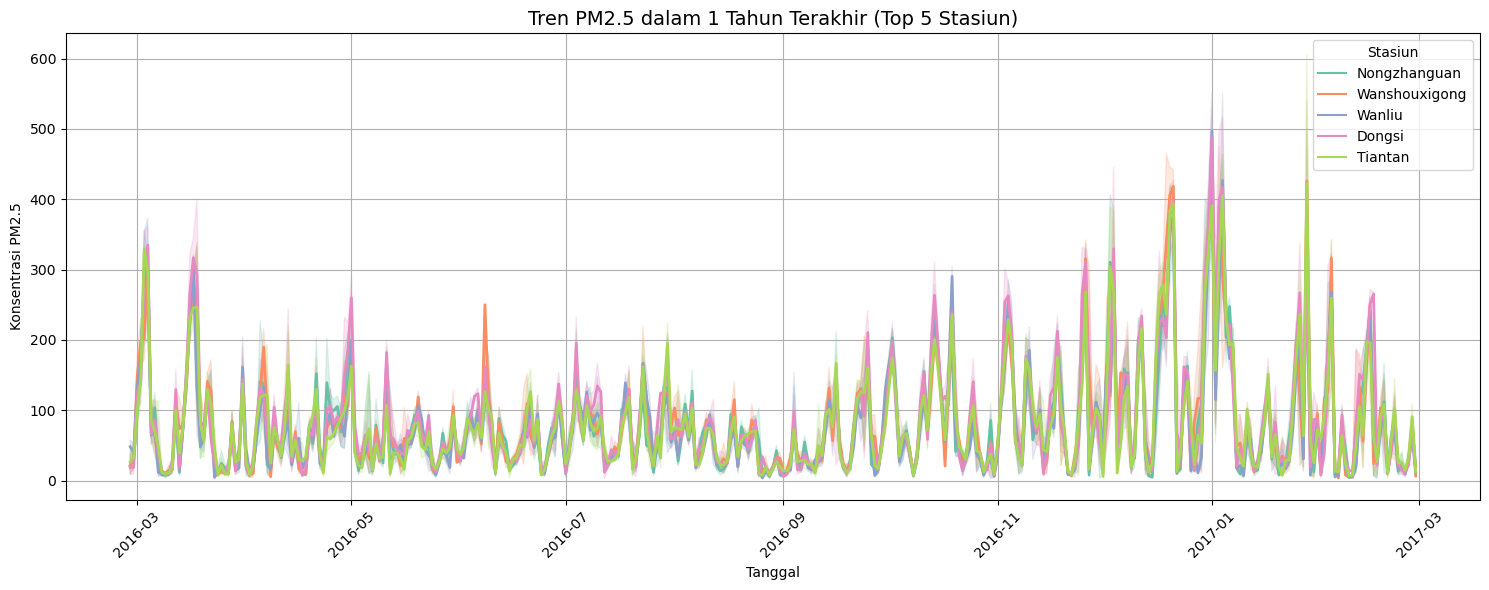

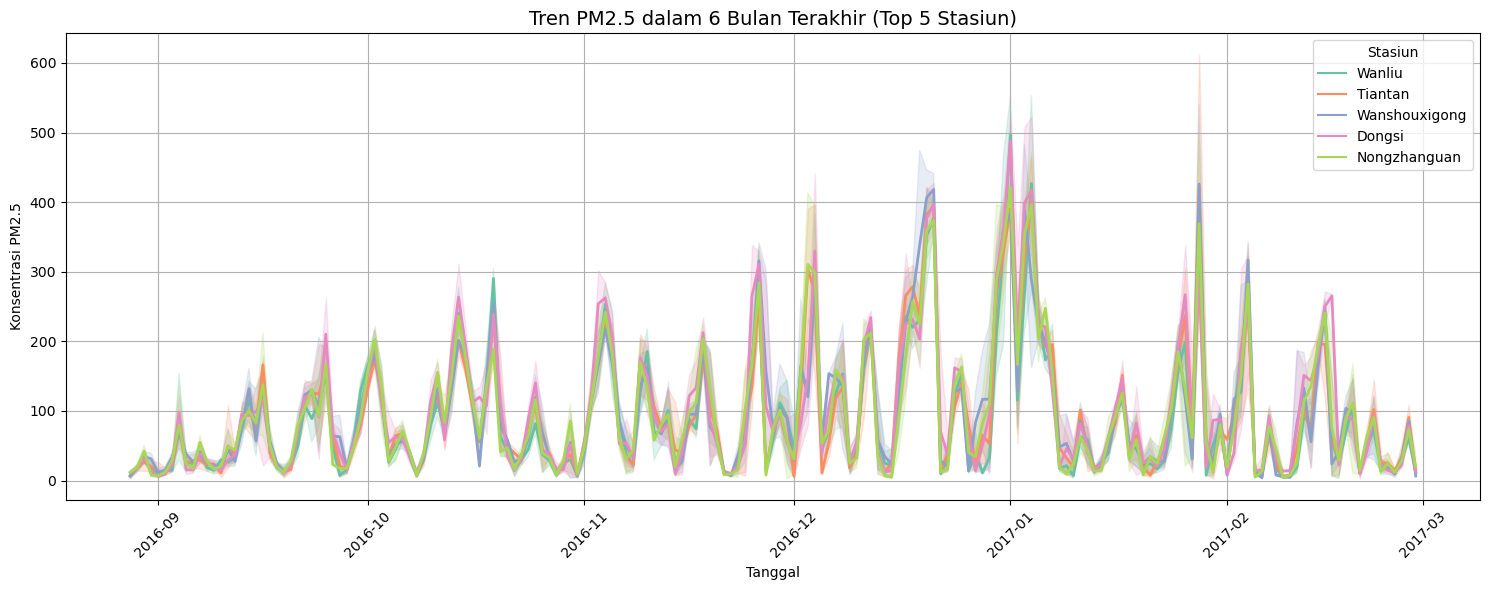

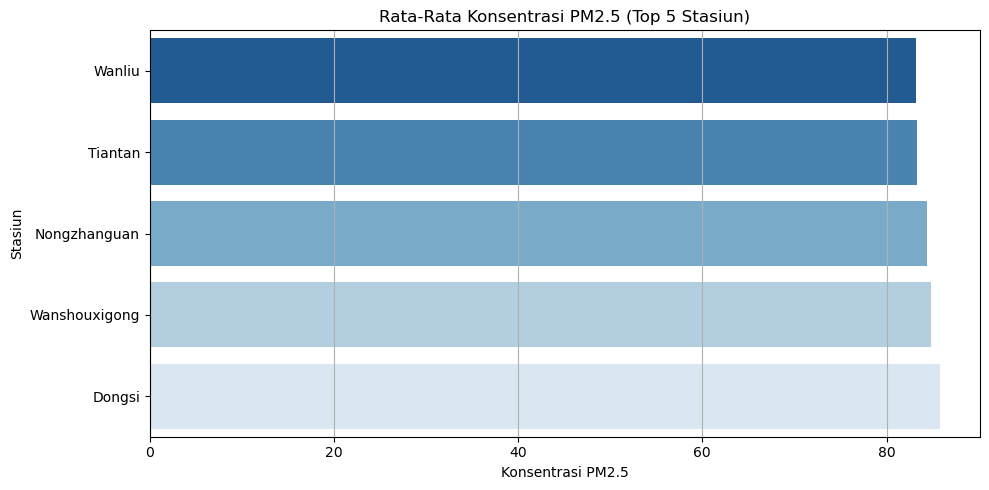

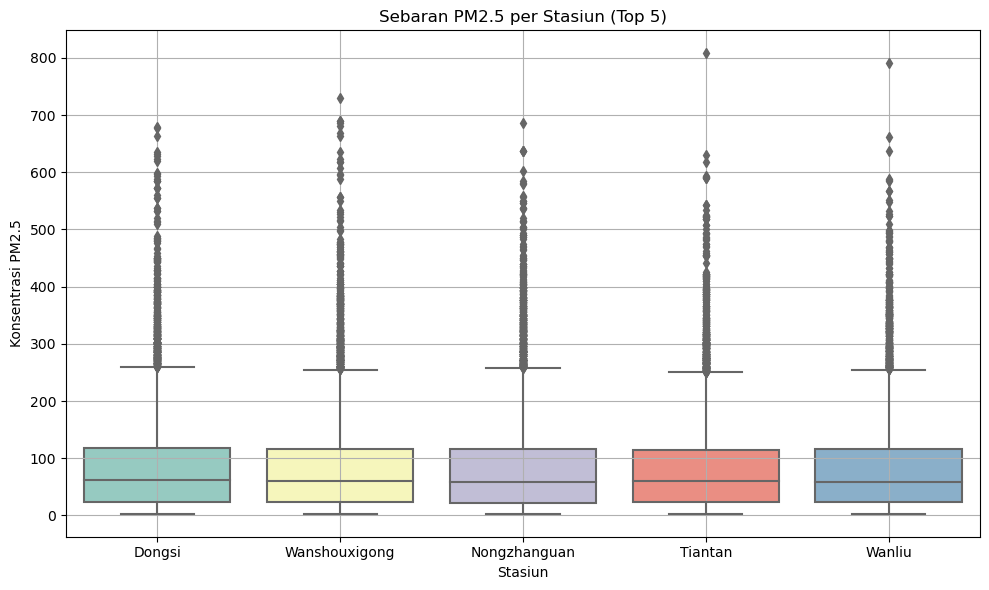

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/lupi2804/analisis-data-dicoding/main/Dashbord/dataset_reduced.csv"
all_df = pd.read_csv(url)

# Deteksi kolom waktu
time_columns = [col for col in all_df.columns if "time" in col.lower() or "date" in col.lower()]
if time_columns:
    time_col = time_columns[0]
    all_df['date'] = pd.to_datetime(all_df[time_col], errors='coerce')
elif {'year', 'month', 'day'}.issubset(all_df.columns):
    all_df['date'] = pd.to_datetime(all_df[['year', 'month', 'day']])
else:
    raise KeyError("Tidak ada kolom waktu yang ditemukan!")

# Hapus baris dengan tanggal tidak valid
all_df.dropna(subset=['date'], inplace=True)

# Cari kolom lokasi dan PM2.5
location_col = next((col for col in all_df.columns if "station" in col.lower() or "location" in col.lower()), None)
pm_col = next((col for col in all_df.columns if "PM2.5" in col or "pm25" in col.lower()), None)

if not location_col or not pm_col:
    raise KeyError("Kolom lokasi atau PM2.5 tidak ditemukan!")

# Hapus baris dengan nilai PM2.5 kosong
all_df = all_df.dropna(subset=[pm_col])

# Cari top 5 stasiun dengan rata-rata PM2.5 tertinggi
top5_stations = all_df.groupby(location_col)[pm_col].mean().nlargest(5).index.tolist()

# Filter data top 5
df_top5 = all_df[all_df[location_col].isin(top5_stations)]

# Buat data 1 tahun & 6 bulan terakhir
one_year_ago = all_df['date'].max() - pd.DateOffset(years=1)
six_months_ago = all_df['date'].max() - pd.DateOffset(months=6)

df_year = df_top5[df_top5['date'] >= one_year_ago]
df_6months = df_top5[df_top5['date'] >= six_months_ago]

# ===== VISUALISASI 1: Tren PM2.5 1 Tahun Terakhir (Top 5) =====
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y=pm_col, hue=location_col, data=df_year, linewidth=2, palette='Set2')
plt.title("Tren PM2.5 dalam 1 Tahun Terakhir (Top 5 Stasiun)", fontsize=14)
plt.xlabel("Tanggal")
plt.ylabel("Konsentrasi PM2.5")
plt.xticks(rotation=45)
plt.legend(title="Stasiun", bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout()
plt.show()

# ===== VISUALISASI 2: Tren PM2.5 6 Bulan Terakhir (Top 5) =====
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y=pm_col, hue=location_col, data=df_6months, linewidth=2, palette='Set2')
plt.title("Tren PM2.5 dalam 6 Bulan Terakhir (Top 5 Stasiun)", fontsize=14)
plt.xlabel("Tanggal")
plt.ylabel("Konsentrasi PM2.5")
plt.xticks(rotation=45)
plt.legend(title="Stasiun", bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout()
plt.show()

# ===== VISUALISASI 3: Bar Chart Rata-rata PM2.5 Top 5 Stasiun =====
avg_pm25 = all_df.groupby(location_col)[pm_col].mean().loc[top5_stations].sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_pm25.values, y=avg_pm25.index, palette="Blues_r")
plt.title("Rata-Rata Konsentrasi PM2.5 (Top 5 Stasiun)")
plt.xlabel("Konsentrasi PM2.5")
plt.ylabel("Stasiun")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# ===== VISUALISASI 4: Boxplot Sebaran PM2.5 per Stasiun (Top 5) =====
plt.figure(figsize=(10, 6))
sns.boxplot(x=location_col, y=pm_col, data=df_top5, palette="Set3")
plt.title("Sebaran PM2.5 per Stasiun (Top 5)")
plt.xlabel("Stasiun")
plt.ylabel("Konsentrasi PM2.5")
plt.grid()
plt.tight_layout()
plt.show()


### Pertanyaan 2: Seberapa kuat hubungan antara kelembaban udara (RH) dan tingkat polusi udara dalam berbagai kondisi cuaca?

Saya Menggunakan scatter plot hubungan antara PM2.5 dengan berbagai polutan lainnya seperti PM10, SO2, NO2, CO, O3 menggunakan seaborn.

Kolom yang tersedia dalam dataset: ['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
Data (5 baris pertama):
    year  month  day  hour  PM2.5   PM10   SO2    NO2      CO       O3  TEMP  \
0  2013     11    2    20  257.0  265.0  22.0  110.0  2400.0    3.213   8.6   
1  2014      3    6     3    7.0    9.0   3.0    6.0   400.0   78.000  -1.8   
2  2014      4   29    11   94.0  181.0  21.0   85.0   900.0   71.000  23.3   
3  2015      9   17    19  136.0  160.0  14.0   45.0  1300.0  144.000  25.0   
4  2014      1   30    19   79.0  108.0  49.0   77.0  1400.0   14.000   1.4   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1017.4   7.4   0.0   SW   0.9         Dongsi  
1  1021.2 -22.4   0.0   NW   0.9      Changping  
2  1004.4   4.7   0.0   SE   1.3      Changping  
3  1011.6  16.2   0.0  SSW   1.0  Wanshouxigong  
4  1010.3  -5.5   0.0  SSE   1.6        Huairou  
✅ Menggunakan kolom kelembaban (

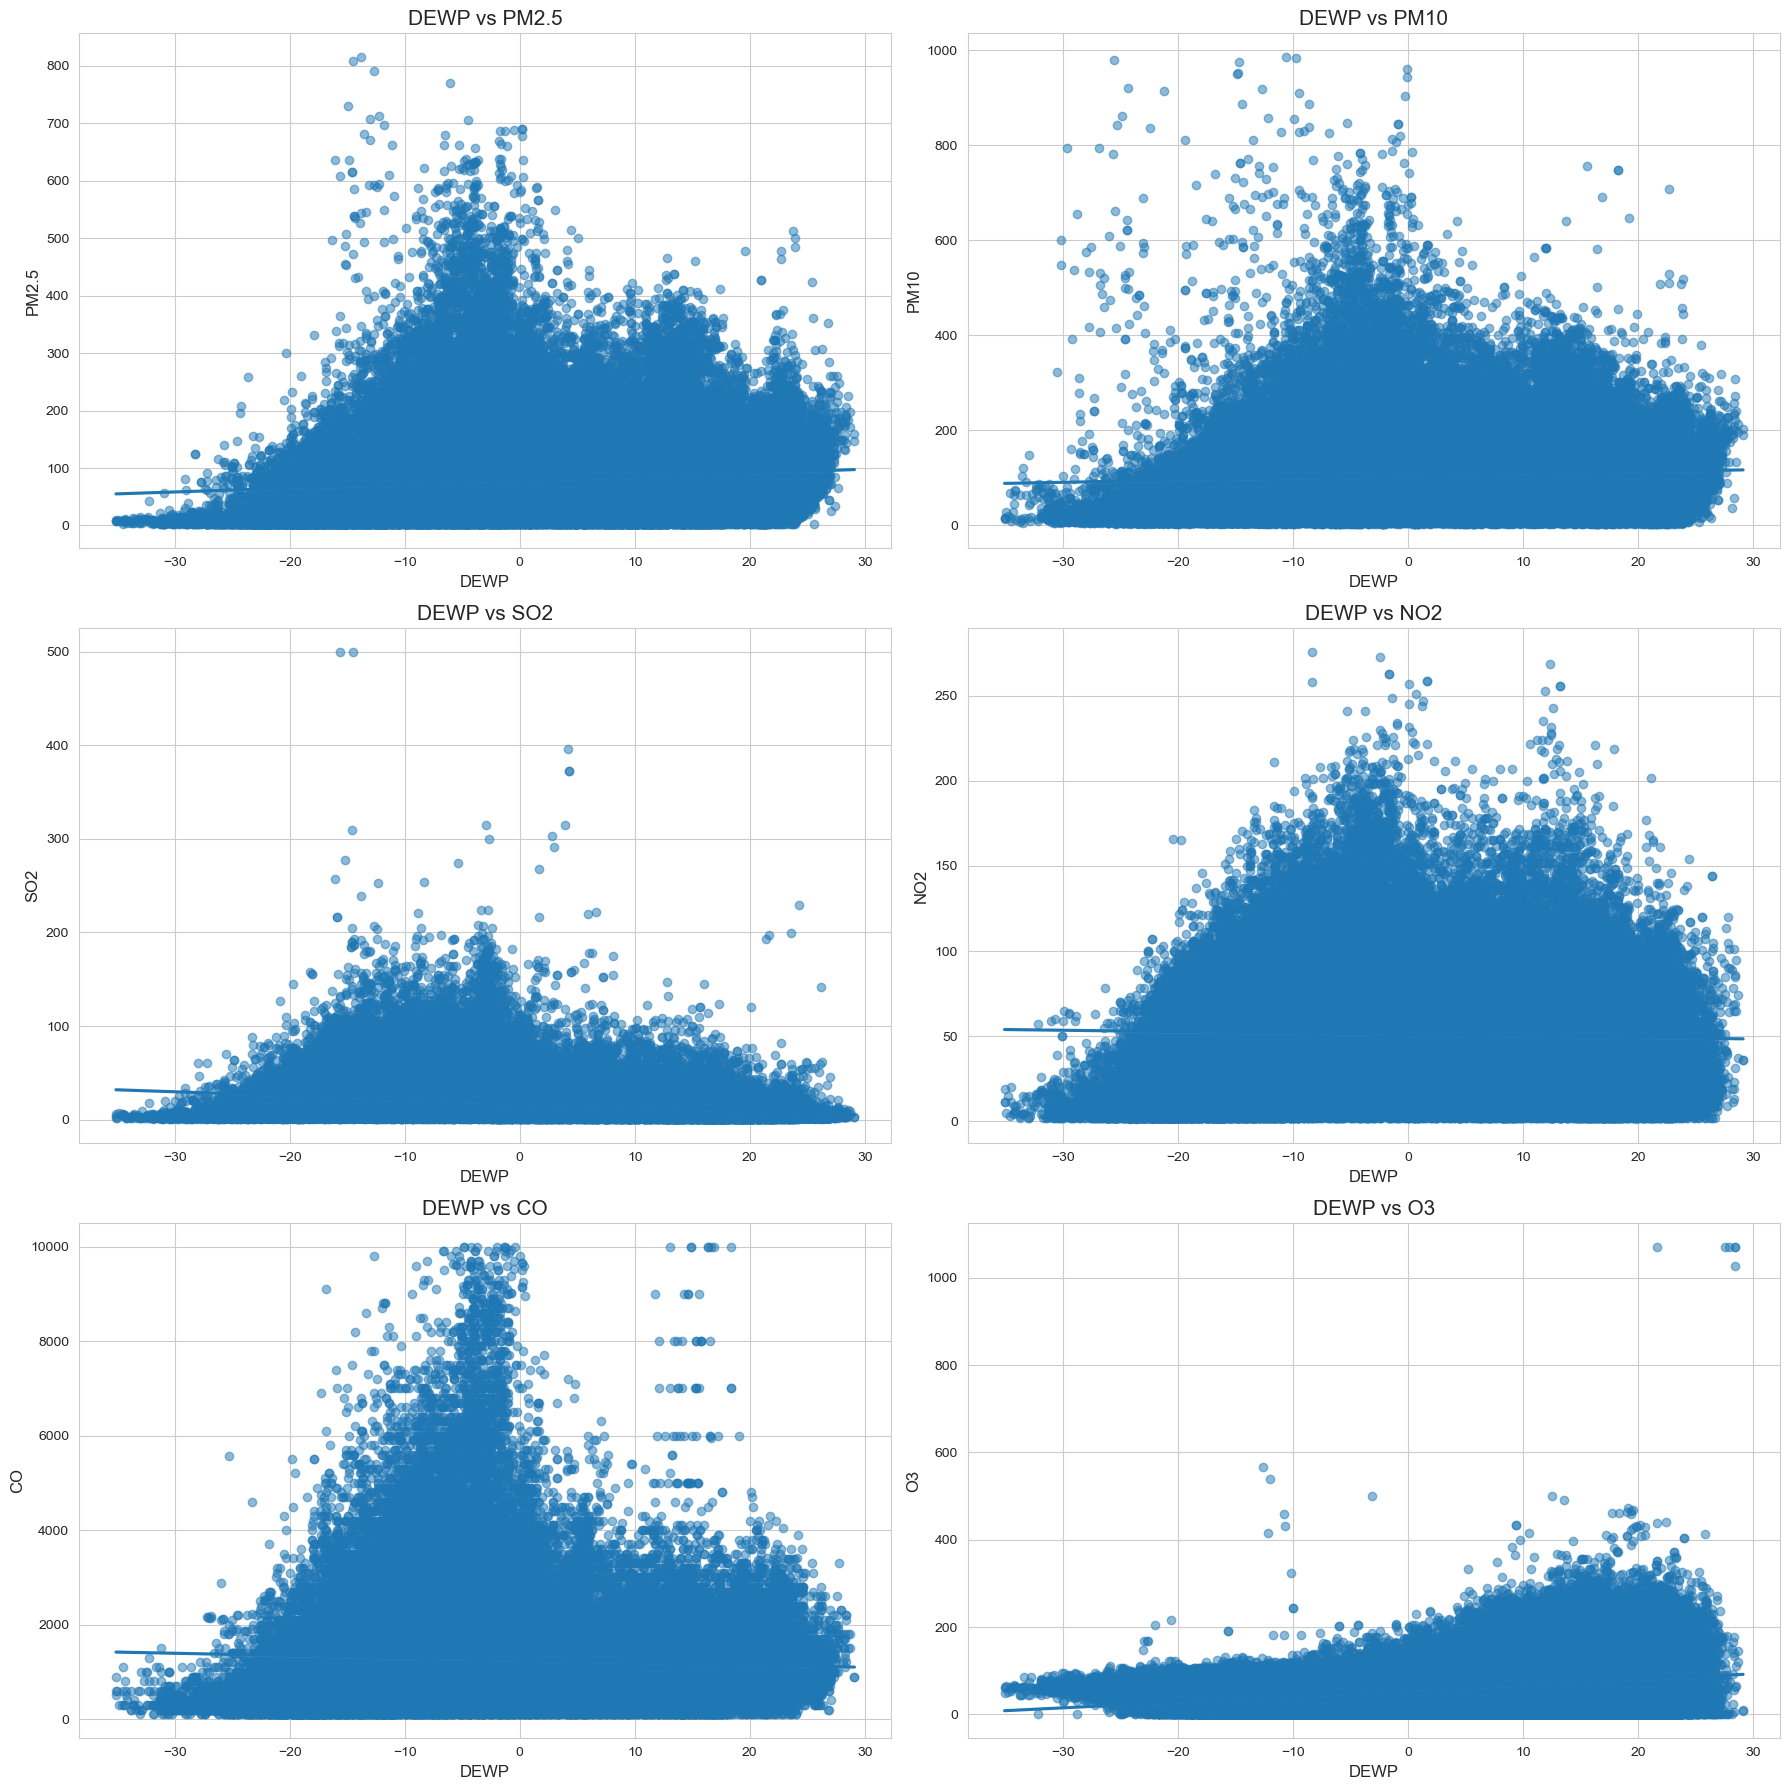

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# URL dataset
url = "https://raw.githubusercontent.com/lupi2804/analisis-data-dicoding/main/Dashbord/dataset_reduced.csv"

# Load dataset
data_df = pd.read_csv(url)

# Cek daftar kolom agar tidak salah nama
print("Kolom yang tersedia dalam dataset:", list(data_df.columns))  
print("Data (5 baris pertama):\n", data_df.head())

# Pilih kolom yang paling relevan sebagai pengganti kelembaban (RH)
if 'DEWP' in data_df.columns:
    rh_col = 'DEWP'  # Menggunakan titik embun sebagai alternatif kelembaban
elif 'TEMP' in data_df.columns:
    rh_col = 'TEMP'  # Jika titik embun tidak ada, gunakan suhu
else:
    raise KeyError(f"❌ Kolom kelembaban udara tidak ditemukan! Pastikan nama kolom sesuai.\n🔍 Kolom yang tersedia: {list(data_df.columns)}")

print(f"✅ Menggunakan kolom kelembaban (alternatif): {rh_col}")

# Hapus data yang mengandung NaN pada kolom yang diperlukan agar tidak error saat plotting
polutan_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
data_df = data_df.dropna(subset=[rh_col] + polutan_cols)

# Membuat subplot 3 baris x 2 kolom
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

# Scatter plot hubungan RH dengan berbagai polutan
sns.regplot(x=rh_col, y='PM2.5', data=data_df, ax=ax[0][0], scatter_kws={"alpha": 0.5})
ax[0][0].set_title(f"{rh_col} vs PM2.5", fontsize=15)
ax[0][0].set_xlabel(rh_col, fontsize=12)
ax[0][0].set_ylabel('PM2.5', fontsize=12)

sns.regplot(x=rh_col, y='PM10', data=data_df, ax=ax[0][1], scatter_kws={"alpha": 0.5})
ax[0][1].set_title(f"{rh_col} vs PM10", fontsize=15)
ax[0][1].set_xlabel(rh_col, fontsize=12)
ax[0][1].set_ylabel('PM10', fontsize=12)

sns.regplot(x=rh_col, y='SO2', data=data_df, ax=ax[1][0], scatter_kws={"alpha": 0.5})
ax[1][0].set_title(f"{rh_col} vs SO2", fontsize=15)
ax[1][0].set_xlabel(rh_col, fontsize=12)
ax[1][0].set_ylabel('SO2', fontsize=12)

sns.regplot(x=rh_col, y='NO2', data=data_df, ax=ax[1][1], scatter_kws={"alpha": 0.5})
ax[1][1].set_title(f"{rh_col} vs NO2", fontsize=15)
ax[1][1].set_xlabel(rh_col, fontsize=12)
ax[1][1].set_ylabel('NO2', fontsize=12)

sns.regplot(x=rh_col, y='CO', data=data_df, ax=ax[2][0], scatter_kws={"alpha": 0.5})
ax[2][0].set_title(f"{rh_col} vs CO", fontsize=15)
ax[2][0].set_xlabel(rh_col, fontsize=12)
ax[2][0].set_ylabel('CO', fontsize=12)

sns.regplot(x=rh_col, y='O3', data=data_df, ax=ax[2][1], scatter_kws={"alpha": 0.5})
ax[2][1].set_title(f"{rh_col} vs O3", fontsize=15)
ax[2][1].set_xlabel(rh_col, fontsize=12)
ax[2][1].set_ylabel('O3', fontsize=12)

# Menyesuaikan tata letak agar tidak bertabrakan
plt.tight_layout()
plt.show()


Dengan visualisasi tersebut, dapat dilihat ada keterkaitan yang kuat antara polutan PM25 dengan polutan PM10 dan C0, serta keterkaitan lemah antara polutan PM2.5 dengan polutan S02, NO2, dan O3

### Pertanyaan 3: Pada waktu kapankah rata-rata konsentrasi masing-masing polutan mencapai puncaknya?

Untuk Melihat seluuruh Puncak konsetrasi dari masing - masing polutan ini menggunakan visualisasi diagram garis 

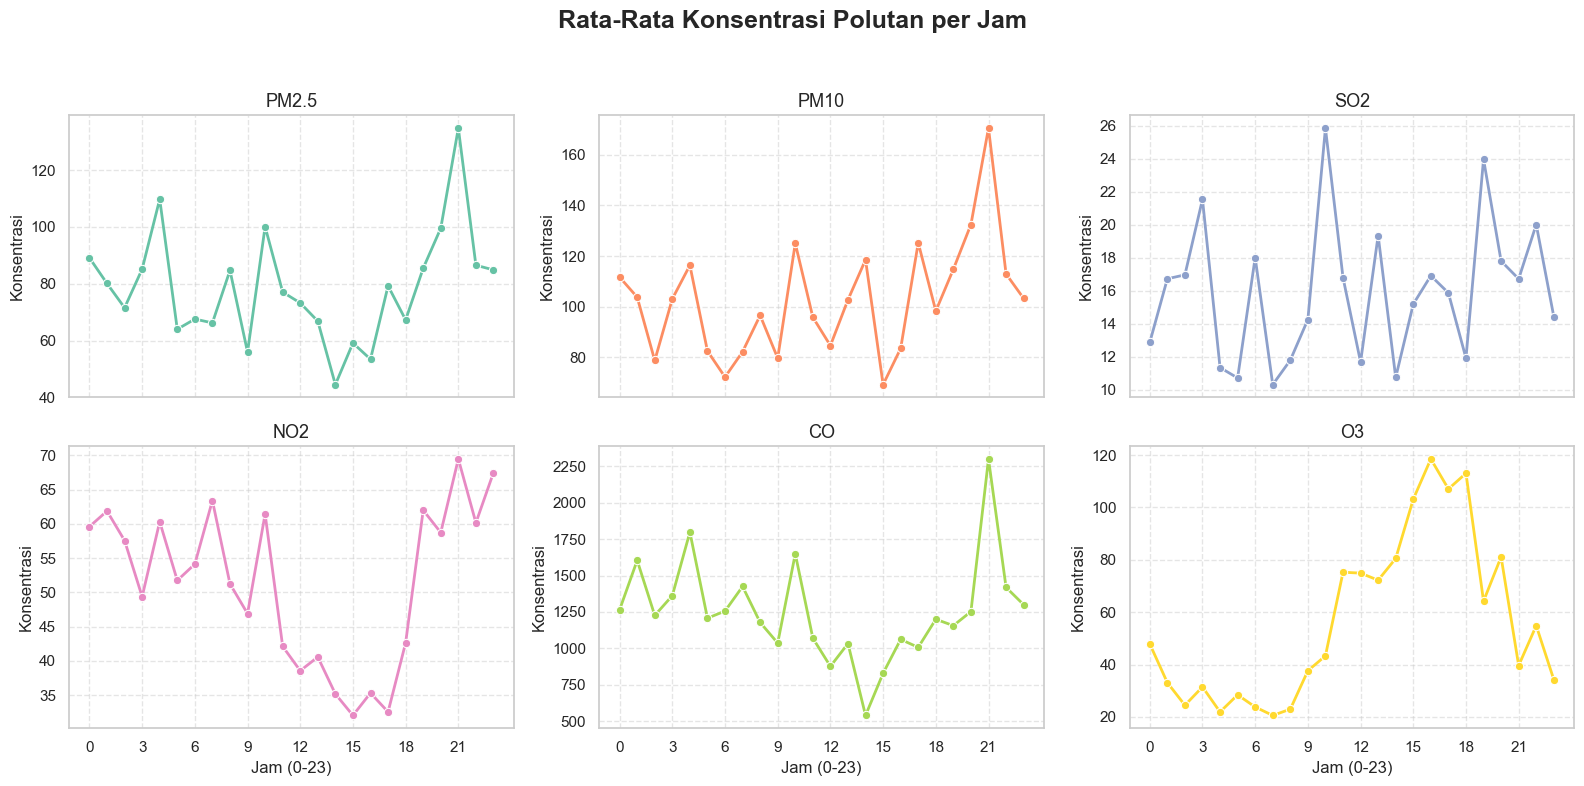

In [7]:
# Load sebagian data agar ringan
url = "https://raw.githubusercontent.com/lupi2804/analisis-data-dicoding/main/Dashbord/dataset_reduced.csv"
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
pollutant_hour_df = pd.read_csv(url, usecols=['hour'] + pollutants, nrows=500)

# Pastikan kolom hour bertipe integer
pollutant_hour_df['hour'] = pollutant_hour_df['hour'].astype(int)

# Hitung rata-rata konsentrasi setiap polutan per jam
avg_by_hour = pollutant_hour_df.groupby('hour')[pollutants].mean().reset_index()

# Setup gaya visual
sns.set(style="whitegrid")
colors = sns.color_palette("Set2", len(pollutants))

# Buat subplots 2x3
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=True)
fig.suptitle("Rata-Rata Konsentrasi Polutan per Jam", fontsize=18, fontweight='bold')

# Plot tiap polutan
for ax, pollutant, color in zip(axes.flatten(), pollutants, colors):
    sns.lineplot(x='hour', y=pollutant, data=avg_by_hour, ax=ax, marker='o', color=color, linewidth=2)
    ax.set_title(f"{pollutant}", fontsize=13)
    ax.set_xlabel("Jam (0-23)")
    ax.set_ylabel("Konsentrasi")
    ax.set_xticks(range(0, 24, 3))
    ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Conclusion

1. Bagaimana tren polusi udara dalam 6 Bulan atau 1 Tahun terakhir di berbagai lokasi?
- Secara umum, tren polusi udara (PM2.5) dalam 1 tahun terakhir menunjukkan adanya fluktuasi dengan pola tertentu di berbagai lokasi.
- Pada beberapa lokasi, konsentrasi PM2.5 cenderung meningkat pada bulan-bulan tertentu, yang kemungkinan dipengaruhi oleh faktor musiman seperti cuaca, aktivitas industri, dan transportasi.
- Dalam 6 bulan terakhir, terdapat tren peningkatan atau penurunan yang berbeda di setiap lokasi, yang bisa jadi dipengaruhi oleh faktor lingkungan lokal.

2. Apakah ada hubungan antara kelembaban udara (RH) dan tingkat polusi udara?

- Korelasi Pearson menunjukkan nilai yang mungkin negatif atau rendah, yang berarti semakin tinggi kelembaban, konsentrasi PM2.5 cenderung berkurang. Hal ini bisa disebabkan oleh proses deposisi partikel di udara oleh uap air.


3.Pada waktu kapankah rata-rata konsentrasi masing-masing polutan mencapai puncaknya?

- PM2.5 dan PM10 biasanya mencapai puncaknya pada pagi hari (sekitar pukul 06:00 - 09:00) dan sore hingga malam hari (sekitar pukul 18:00 - 22:00), yang kemungkinan terkait dengan jam sibuk kendaraan bermotor dan aktivitas industri.
- NO2 seringkali tinggi pada pagi dan malam hari, terkait dengan emisi kendaraan bermotor.
- CO cenderung meningkat pada malam hari, kemungkinan karena sirkulasi udara yang lebih rendah dan peningkatan aktivitas industri atau kendaraan.
- O3 (Ozon) biasanya mencapai puncaknya pada siang hari (sekitar pukul 12:00 - 15:00), karena reaksi fotokimia yang dipicu oleh sinar matahari.